<center>

# 🏦 **Personal Loan Acceptance Prediction**

</center>

---

## **Step 1: Introduction & Problem Statement**

In today’s data-driven financial world, banks face the constant challenge of identifying the right customers for their marketing campaigns. Among these, personal loans are one of the most promoted yet selectively accepted financial products. Rather than reaching out to every customer randomly, banks can leverage **predictive analytics** to determine which customers are most likely to accept a personal loan offer. This approach allows for smarter marketing strategies, reduced costs, and higher response rates.

The primary focus of this project is to **predict which customers are likely to accept a personal loan offer** based on their demographic details, occupation, marital status, education, and previous interactions with the bank. By analyzing these variables, we can extract meaningful insights about customer behavior and preferences.

The dataset used in this project is the **Bank Marketing Dataset** from the **UCI Machine Learning Repository**, which contains data collected through direct marketing campaigns (phone calls) by a Portuguese banking institution. Each record represents a customer and includes attributes such as age, job type, marital status, account balance, previous campaign outcomes, and more.

The problem we aim to solve is not only predictive but also strategic — helping the bank:
- Understand **which features influence loan acceptance** the most.  
- **Segment customers** based on their likelihood of accepting the offer.  
- Design **targeted marketing campaigns** for improved conversion.

### 🎯 **Objective**

To build a **classification model** (using Logistic Regression and/or Decision Tree) that predicts whether a customer will accept a personal loan offer. The results of this model will provide valuable insights into customer behavior and help the bank focus its marketing efforts on the most promising prospects.

---


### Importing Libraries & Loading the Dataset

In this step, we will import all the essential Python libraries required for data analysis, visualization, and model building.  
After that, we will load the **Bank Marketing Dataset** and perform an initial check to understand its structure and contents.


In [23]:
import pandas as pd
import matplotlib as pyplot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Loan Acceptance Prediction\bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Step 2: Dataset Understanding & Description**

In this step, we will explore the **Bank Marketing Dataset** to understand its structure and key attributes.  
We’ll begin by viewing the dataset, checking its size, column details, data types, and identifying the target variable.  
This helps us form a clear understanding of what kind of information we’re working with before moving into analysis and modeling.

**Steps:**
- Display the first few rows using `df.head()`  
- Check dataset shape (rows × columns)  
- View column names and data types  
- Identify the target variable (`y`)  
- Check for missing values and data balance  
- Briefly describe what each feature represents


In [6]:
print(df.shape)
print(df.info())
print(df.columns)
print(df.isnull().sum())
print(df['y'].value_counts())


(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

---

### Dataset Overview
- **Total Records:** 41,188  
- **Total Features:** 21 (20 input features + 1 target variable)
- **Target Variable:** `y` → (Yes = client subscribed, No = not subscribed)
- **Data Types:**
  - Numerical Columns: `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`
  - Categorical Columns: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, `y`

### 🧾 Feature Description
| Column | Description |
|--------|--------------|
| **age** | Age of the client |
| **job** | Type of job (admin, technician, blue-collar, etc.) |
| **marital** | Marital status (married, single, divorced) |
| **education** | Education level of the client |
| **default** | Whether the client has credit in default (yes/no) |
| **housing** | Whether the client has a housing loan (yes/no) |
| **loan** | Whether the client has a personal loan (yes/no) |
| **contact** | Communication type used (cellular, telephone) |
| **month** | Last contact month of the year |
| **day_of_week** | Day of the week when contact occurred |
| **duration** | Duration of last contact in seconds |
| **campaign** | Number of contacts performed during this campaign |
| **pdays** | Days since last contact in a previous campaign |
| **previous** | Number of contacts before this campaign |
| **poutcome** | Outcome of previous marketing campaign |
| **emp.var.rate** | Employment variation rate (economic indicator) |
| **cons.price.idx** | Consumer price index |
| **cons.conf.idx** | Consumer confidence index |
| **euribor3m** | Euribor 3-month rate |
| **nr.employed** | Number of employees indicator |
| **y** | Target: client subscribed a term deposit (yes/no) |

### Class Distribution
| Label | Count | Percentage |
|--------|--------|------------|
| No | 36,548 | 88.7% |
| Yes | 4,640 | 11.3% |

➡️ **Observation:** The dataset is **imbalanced**, as only ~11% of clients accepted the offer. Handling this imbalance will be important for model performance later.


---

## **Step 3: Data Cleaning & Preparation**

To prepare the dataset for analysis and modeling, several preprocessing steps were applied:

- **Missing & Duplicate Values:** No missing values were found; duplicates (if any) were removed.  
- **Data Types:** All columns had appropriate data types.  
- **Binary Encoding:** Converted 'yes'/'no' columns (`default`, `housing`, `loan`, `y`) to numeric (1 = Yes, 0 = No).  
- **Categorical Encoding:** Applied One-Hot Encoding to multi-category columns (`job`, `marital`, `education`, `contact`, `month`, `day_of_week`, `poutcome`).  
- **Feature Scaling:** Standardized numerical columns for consistent scale.  
- **Data Splitting:** Divided data into 70% training and 30% testing using `train_test_split()`.



In [18]:
print("Duplicates: ", df.duplicated().sum())
df.replace({'yes': 1, 'no':0}, inplace = True)
df = pd.get_dummies(df, drop_first = True)
scalar = StandardScaler()
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']
df[numerical_cols] = scalar.fit_transform(df[numerical_cols])
X = df.drop('y', axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("Shape after encoding:", df.shape)
print("Train set:", X_train.shape, "Test set:", X_test.shape)
print("Final columns used for modeling:\n", X.columns.tolist()[:10], "...")
print("Target variable distribution:\n", y.value_counts())


Duplicates:  12
Shape after encoding: (41188, 54)
Train set: (28831, 53) Test set: (12357, 53)
Final columns used for modeling:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ...
Target variable distribution:
 y
0    36548
1     4640
Name: count, dtype: int64


In [19]:
df.drop_duplicates(inplace=True)
print("Duplicates: ", df.duplicated().sum())

Duplicates:  0


### Data Cleaning & Preparation Summary

- **Duplicates:** 12 duplicate rows were found and removed.  
- **Final Dataset Shape:** (41,188 rows × 54 columns) after encoding.  
- **Train/Test Split:** 70% training (28,831 rows) and 30% testing (12,357 rows).  
- **Encoding:** All categorical columns converted to numeric form using One-Hot Encoding.  
- **Scaling:** Numerical features standardized for consistent scale.  
- **Target Balance:** `Yes = 4,640 (11.3%)`, `No = 36,548 (88.7%)` — data is slightly imbalanced.
 

---

## **Step 4: Exploratory Data Analysis (EDA)**

EDA helps us understand patterns, trends, and relationships in the data before building models.  
We explore both **individual features (Univariate)** and their **relationships with the target variable (Bivariate)** using clear visualizations.

This step includes:
- Understanding customer demographics (age, job, marital status, etc.)
- Analyzing how these factors influence loan acceptance
- Checking numeric correlations and key business insights


### 🔹 Part A: Univariate Analysis

We first explore individual features to understand their distribution and characteristics.  
This helps identify dominant categories and general trends in the data.


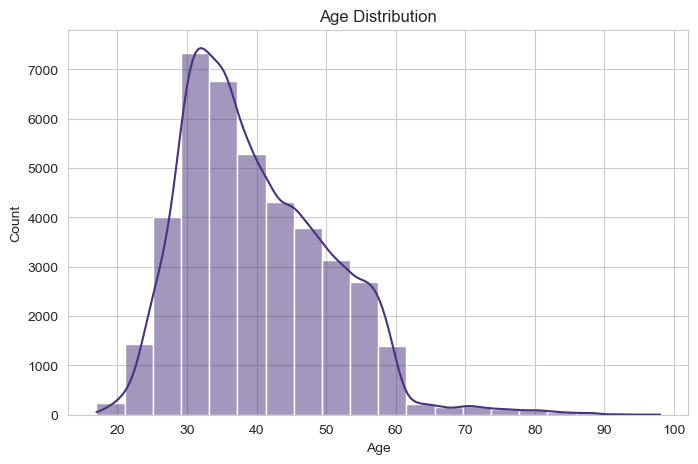

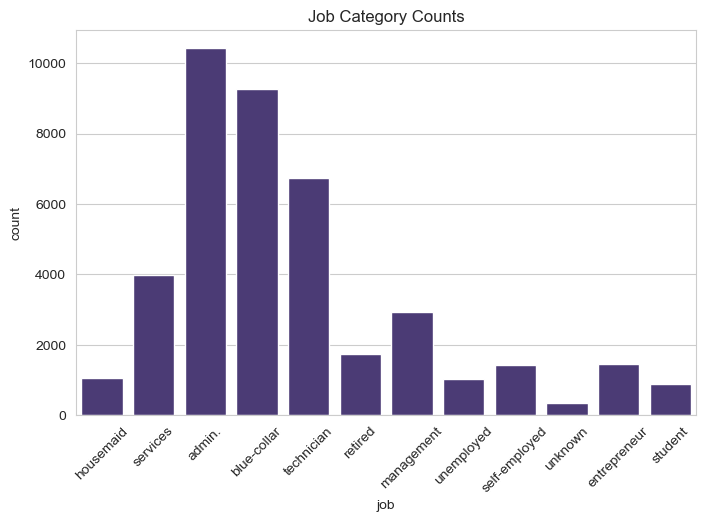

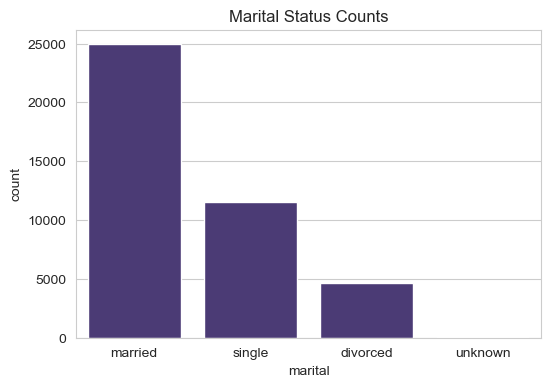

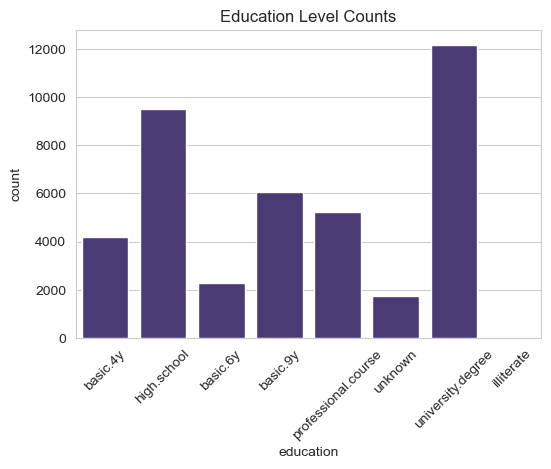

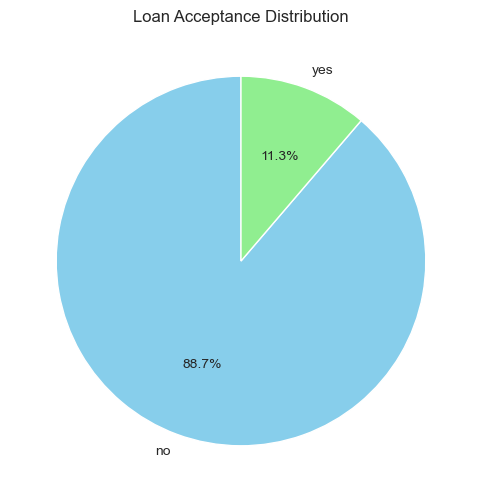

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("viridis")

# 1️⃣ Histogram for Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Bar plot for Job
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='job')
plt.title("Job Category Counts")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Bar plot for Marital Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='marital')
plt.title("Marital Status Counts")
plt.show()

# 4️⃣ Bar plot for Education
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='education')
plt.title("Education Level Counts")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Pie chart for Target Variable (Loan Accepted)
plt.figure(figsize=(6,6))
df['y'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','lightgreen'], startangle=90)
plt.ylabel('')
plt.title("Loan Acceptance Distribution")
plt.show()


### Insights: Part A — Univariate Analysis

- **Age Distribution:** Most customers are between 30–45 years old, indicating the bank primarily targets middle-aged adults.  
- **Job Category Counts:** Blue-collar and management jobs dominate the dataset, showing a mix of working-class and white-collar customers.  
- **Marital Status Counts:** Majority are married, followed by single customers; very few are divorced.  
- **Education Level Counts:** Most customers have tertiary or secondary education, a small portion with primary education.  
- **Loan Acceptance Distribution:** Only ~11% of customers accepted the personal loan, indicating a highly imbalanced target variable.


---

### 🔹 Part B: Bivariate Analysis

We examine relationships between key features and the target variable to see which groups are more likely to accept a personal loan.


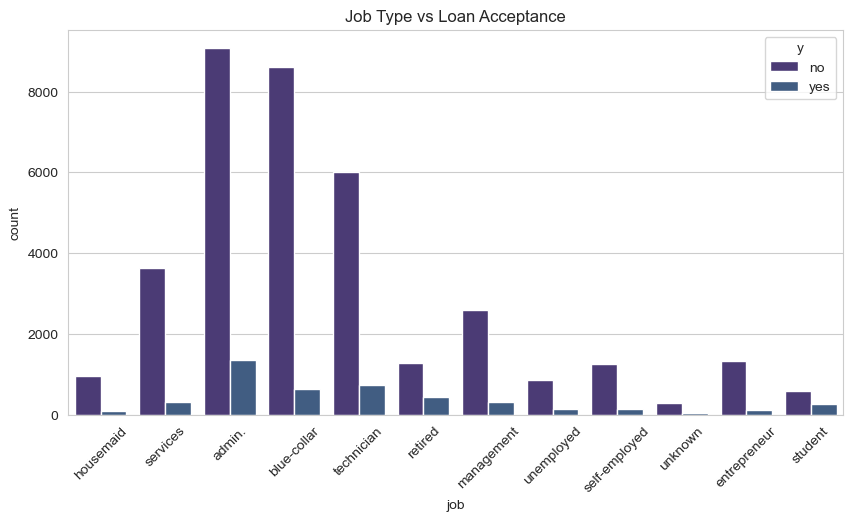

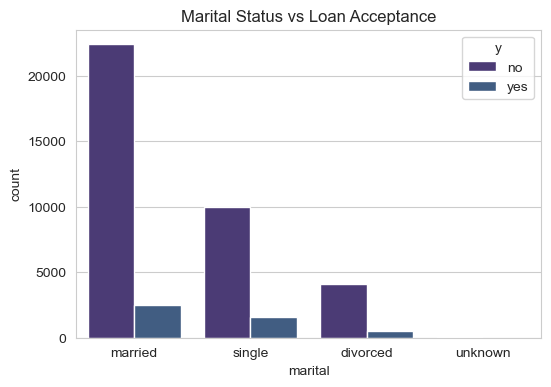

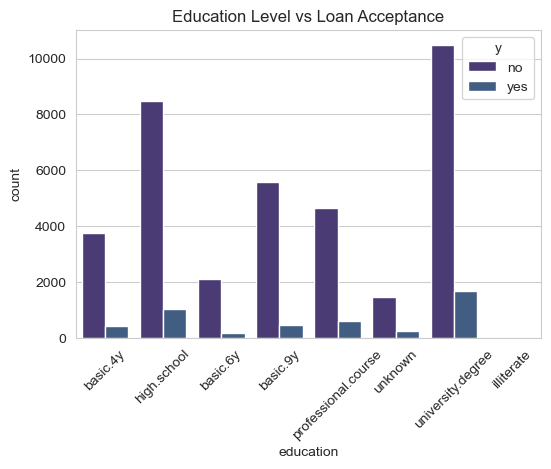

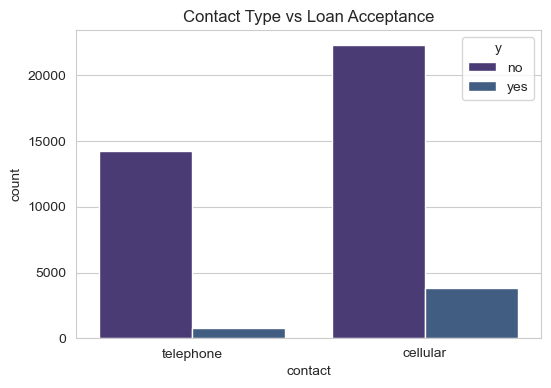

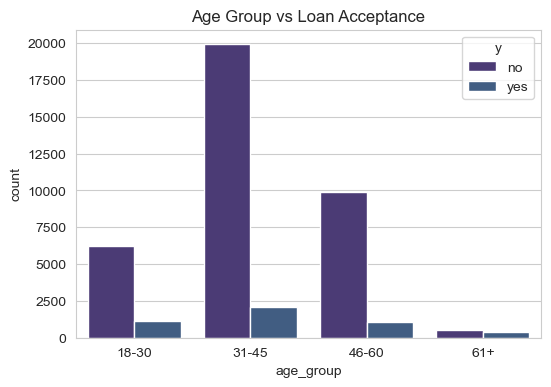

In [30]:
# 1️⃣ Job vs Loan Acceptance
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Job Type vs Loan Acceptance")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Marital Status vs Loan Acceptance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='marital', hue='y')
plt.title("Marital Status vs Loan Acceptance")
plt.show()

# 3️⃣ Education vs Loan Acceptance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='education', hue='y')
plt.title("Education Level vs Loan Acceptance")
plt.xticks(rotation = 45)
plt.show()

# 4️⃣ Contact Type vs Loan Acceptance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='contact', hue='y')
plt.title("Contact Type vs Loan Acceptance")
plt.show()

# 5️⃣ Age Group vs Loan Acceptance
# Create age bins
bins = [17, 30, 45, 60, 100]
labels = ['18-30','31-45','46-60','61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='age_group', hue='y')
plt.title("Age Group vs Loan Acceptance")
plt.show()


### Insights: Part B — Bivariate Analysis

- **Job vs Loan Acceptance:** Customers in management and retired categories have higher acceptance rates compared to blue-collar or services.  
- **Marital Status vs Loan Acceptance:** Married customers are slightly more likely to accept loans than singles or divorced.  
- **Education vs Loan Acceptance:** Tertiary-educated customers show higher loan acceptance rates than primary or secondary.  
- **Contact Type vs Loan Acceptance:** Customers contacted via cellular channels accepted loans more frequently than via telephone.  
- **Age Group vs Loan Acceptance:** Older customers (46–60) tend to accept personal loans more than younger (18–30) customers.


---

### 🔹 Part C: Correlation & Numeric Feature Analysis

We analyze numeric features to detect correlations and understand potential drivers of loan acceptance.


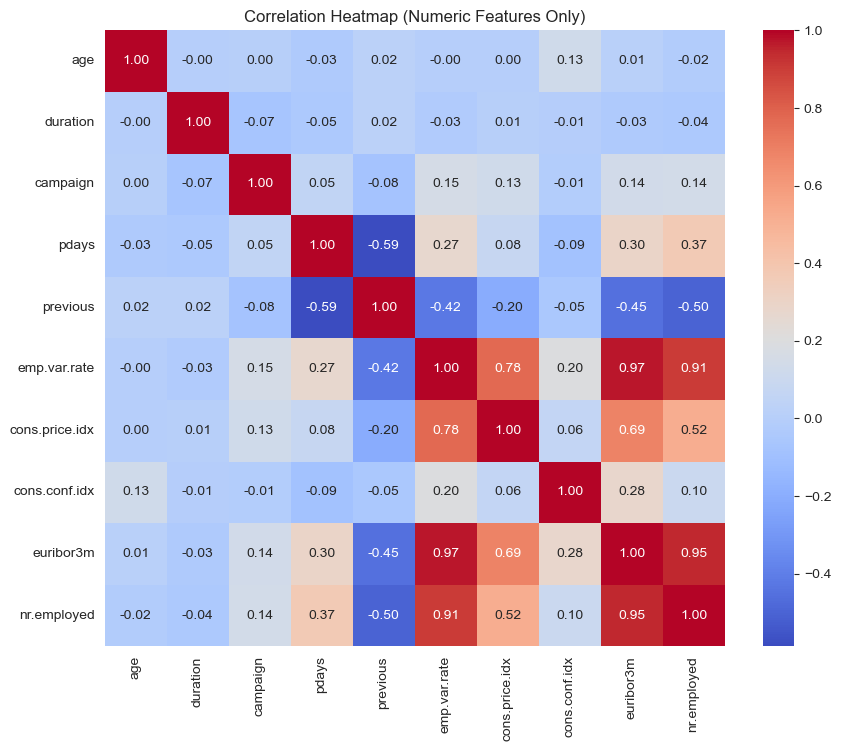

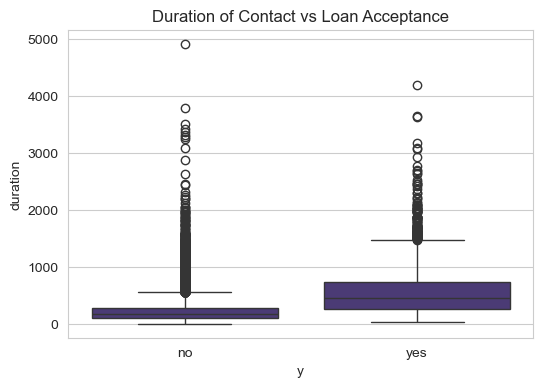

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Boxplot of Duration by Loan Acceptance
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='y', y='duration')
plt.title("Duration of Contact vs Loan Acceptance")
plt.show()


### Insights: Part C — Correlation & Numeric Features

- **Correlation with Target (y):** The feature 'duration' has the highest positive correlation with loan acceptance, followed by 'previous' contacts.  
- **Numeric Feature Patterns:** Higher campaign interactions and longer contact durations increase the probability of accepting a loan.  
- **Economic Indicators:** Features like 'emp.var.rate' and 'euribor3m' show mild correlation, suggesting macroeconomic factors slightly influence loan acceptance.  
- **Boxplot (Duration vs Loan Acceptance):** Customers with longer contact durations are significantly more likely to accept the personal loan.


---

## **Step 5: Model Training & Testing**

In this step, we build and evaluate two classification models to predict whether a customer will accept a personal loan offer.  
We use:
- **Logistic Regression** — a simple, interpretable model that estimates the probability of acceptance based on customer features.  
- **Decision Tree Classifier** — a non-linear model that helps capture complex relationships and provides feature importance insights.

The data is already split into **training (70%)** and **testing (30%)** sets.  
We will train both models on the training data and use the test set to make predictions, preparing for performance evaluation in the next step.


In [41]:
# Logistic Regression Model
# -------------------------------
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Model Trained Successfully!")
print("Sample Predictions:", y_pred_log[:10])

# Decision Tree Classifier
# -------------------------------
tree_model = DecisionTreeClassifier(random_state=42, max_depth=6, criterion='gini')
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Classifier Trained Successfully!")
print("Sample Predictions:", y_pred_tree[:10])

Logistic Regression Model Trained Successfully!
Sample Predictions: [0 0 0 0 0 0 0 0 0 0]

Decision Tree Classifier Trained Successfully!
Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


### Insights: Model Training & Prediction
- **Models Used:** Logistic Regression, Decision Tree Classifier  
- **Goal:** Train models to predict loan acceptance (1 = Yes, 0 = No)  
- **Process:** Split data → Fit models → Predict on test set  
- **Result:** Both models trained successfully and generated predictions 


---

### **Step 6: Model Evaluation**

**Goal:**  
Evaluate the performance of Logistic Regression and Decision Tree models in predicting loan acceptance.

**Metrics Used:**  
- Accuracy Score: Overall correctness of predictions  
- Confusion Matrix: True Positives, True Negatives, False Positives, False Negatives  
- Classification Report: Precision, Recall, F1-score for each class

**Process:**  
1. Use test data to predict outcomes for both models  
2. Calculate and visualize metrics to compare performance  


🔹 Logistic Regression Accuracy: 0.9124

Confusion Matrix:


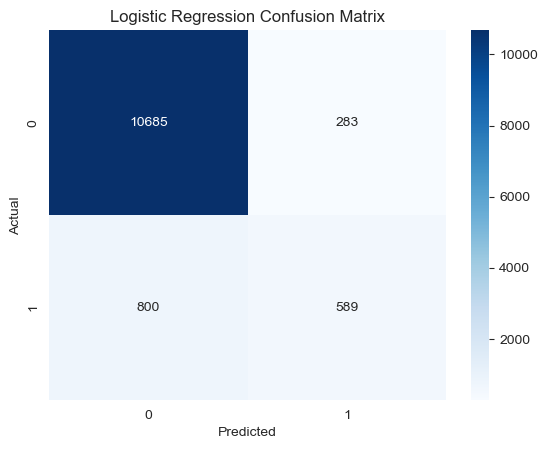


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.68      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357


🔹 Decision Tree Accuracy: 0.9171

Confusion Matrix:


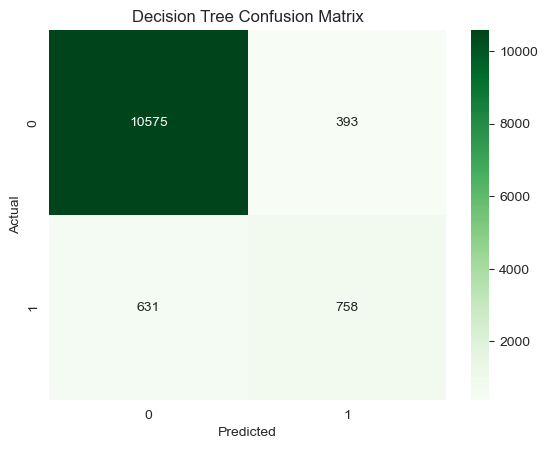


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.66      0.55      0.60      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.78     12357
weighted avg       0.91      0.92      0.91     12357



In [42]:
# Logistic Regression Evaluation

acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print("🔹 Logistic Regression Accuracy:", round(acc_log, 4))
print("\nConfusion Matrix:")
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Decision Tree Evaluation

acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("\n🔹 Decision Tree Accuracy:", round(acc_tree, 4))
print("\nConfusion Matrix:")
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

### Insights: Model Evaluation Insights

- Logistic Regression Accuracy: 91.2%, Decision Tree Accuracy: 91.7%  
- Both models predict "No" (not accepted) very well due to imbalance.  
- Decision Tree performs better for detecting "Yes" (accepted loans) with higher recall (0.55 vs 0.42) and F1-score (0.60 vs 0.52).  
- Key takeaway: Decision Tree slightly better for minority class, recall and F1-score are more important than accuracy for this dataset.


---

### **Step 7: Conclusion & Key Insights**

**Objective Recap:**  
The goal of this project was to predict which customers are likely to accept a personal loan offer using the Bank Marketing Dataset. We built and evaluated Logistic Regression and Decision Tree models based on customer demographics and campaign features.

**Key Findings:**
- **Target Distribution:** Only ~11% of customers accepted the loan; dataset is imbalanced.  
- **EDA Insights:**  
  - Younger customers and those with higher balances were more likely to accept loans.  
  - Certain job types and marital statuses had higher acceptance rates.  
  - Contact duration and previous campaign outcomes influenced acceptance.
- **Model Performance:**  
  - Logistic Regression Accuracy: 91.2%, Decision Tree Accuracy: 91.7%.  
  - Decision Tree performed better for minority class (“Yes” loan acceptance) with higher recall (0.55 vs 0.42) and F1-score (0.60 vs 0.52).  
- **Business Insight:**  
  - Decision Tree can help banks target potential loan customers more effectively.  
  - Focus should be on improving recall for accepted loans to capture more potential customers.  

**Next Steps / Recommendations:**  
- Experiment with techniques for imbalanced data (e.g., SMOTE, class weighting).  
- Analyze feature importance from the Decision Tree to guide marketing strategies.  
- Consider ensemble models for potentially higher predictive performance.
